# H1B VISA DATA ANALYSIS

# importing libraries

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "."

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nsharan/h-1b-visa",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\Swift3\AppData\Local\Temp\ipykernel_28188\116435914.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading  csv file

In [ ]:
f = pd.read_csv("h1b_kaggle.csv")
f.head()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


deleting unnamed column

In [ ]:
del f['Unnamed: 0']
len(f)

3002458

In [ ]:
f = f.dropna()
f.reset_index()
lng = len(f)
print(lng)

2877765


In [ ]:
f.head()


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


TOP EMPLOYERS

In [ ]:
f.EMPLOYER_NAME.value_counts().head(15)

EMPLOYER_NAME
INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
CAPGEMINI AMERICA INC                               16628
GOOGLE INC.                                         16425
LARSEN & TOUBRO INFOTECH LIMITED                    14318
IGATE TECHNOLOGIES INC.                             12327
IBM CORPORATION                                     11976
Name: count, dtype: int64

<Axes: title={'center': 'TOP 15 Hiring Company'}, xlabel='EMPLOYER_NAME'>

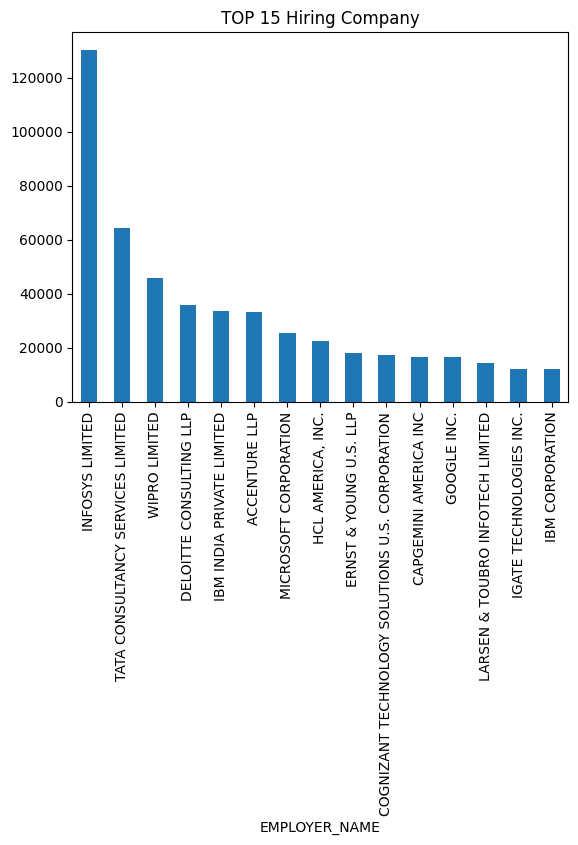

In [ ]:
f['EMPLOYER_NAME'].value_counts().head(15).plot(kind = 'bar',title = "TOP 15 Hiring Company") 

ANALYZING THE PREVAILING WAGE

In [ ]:
f.PREVAILING_WAGE.value_counts().sort_values(ascending = False ).head()

PREVAILING_WAGE
60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: count, dtype: int64

In [ ]:
f.PREVAILING_WAGE.mean()

np.float64(145166.64888401062)

In [ ]:
###Wages given by the employers

In [43]:

f.groupby(['PREVAILING_WAGE']).sum()



,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,lon,lat
PREVAILING_WAGE,,,,,,,,,
0.000000e+00,DENIEDDENIEDDENIEDDENIEDDENIEDWITHDRAWNDENIEDD...,LOTUS SOFT CORPORATIONPERSON AREA RUGS LLCNATI...,COMPUTER AND INFORMATION SYSTEMS MANAGERSMANAG...,CIS MANAGERSE - COMMERCE MANAGEROPERATIONS AND...,NNNNNNNNNNNNYYYYYYYYYY,44335.0,"NEW YORK, NEW YORKPISCATAWAY, NEW JERSEYCHICAG...",-1956.809598,789.709035
1.516000e+01,DENIED,FREEDOM GUITAR INC.,Sound Engineering Technicians,SOUND ENGINEER,N,2012.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
3.169000e+01,DENIED,KALVEN TECHNOLOGIES INC,"Software Developers, Applications",SOFTWARE ENGINEER,N,2012.0,"ELK GROVE VILLAGE, ILLINOIS",-87.970346,42.003918
3.500000e+01,DENIED,CENTRO CULTURAL ESPANOL INC,ART DIRECTORS,CULTURAL DIRECTOR,N,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6.345000e+01,DENIED,"ALTUS TECHNOLOGIES,INC",Computer Programmer Non R & D,PROGRAMMER ANALYST,Y,2011.0,"RALEIGH, NORTH CAROLINA",-78.638179,35.779590
...,...,...,...,...,...,...,...,...,...
6.169317e+08,DENIED,ARKRIT LLC,Computer Systems Analysts,PROGRAMMER/ANALYST,Y,2014.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
7.099999e+08,DENIED,"IDEXCEL, INC.","Software Developers, Applications",.NET DEVELOPER,Y,2013.0,"COLUMBUS, OHIO",-82.998794,39.961176
8.201323e+08,DENIED,DISCOVER PRODUCTS INC.,Statisticians,PROJECT MANAGER,Y,2014.0,"RIVERWOODS, ILLINOIS",-87.897014,42.167525


WORKSITE 

In [44]:
f['WORKSITE'].value_counts().head(20)

WORKSITE
NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: count, dtype: int64

In [45]:
f.loc[:,'WORKSITE'] = f.loc[:,'WORKSITE'].apply(lambda rec:rec.split(',')[1][1:])
def change_NA(rec):
    if (rec=='NA') :
        return 'MARIANA ISLAND'
    return rec
f.loc[:,'WORKSITE'] = f.loc[:,'WORKSITE'].apply(lambda rec: change_NA(rec))
print(len(f['WORKSITE'].unique()))

53


<Axes: xlabel='WORKSITE'>

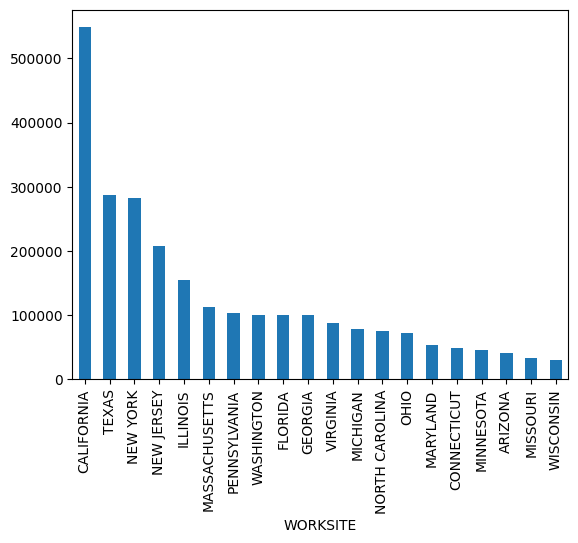

In [46]:
f['WORKSITE'].value_counts().head(20).plot(kind='bar')

Changing the columns name

In [47]:
f.rename(columns ={'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATES','lon':'LON','lat':'LAT'},inplace = True)

In [48]:
columns_to_keep = ['CASE_STATUS','YEAR','STATES','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON','LAT']
f =f[columns_to_keep]
f.columns

Index(['CASE_STATUS', 'YEAR', 'STATES', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

Setting the precision value upto 2 decimal place 

In [49]:
f['LON'] = f['LON'].apply(lambda lon : float("% .2f" %lon))

In [50]:
f['LAT'] = f['LAT'].apply(lambda lat : float("% .2f" %lat))

In [51]:
f.head()

,CASE_STATUS,YEAR,STATES,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.70,33.02
2,CERTIFIED-WITHDRAWN,2016.0,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,"PORTS AMERICA GROUP, INC.",-74.08,40.73
3,CERTIFIED-WITHDRAWN,2016.0,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.99,39.74
4,WITHDRAWN,2016.0,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,PEABODY INVESTMENTS CORP.,-90.20,38.63


In [52]:
f['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

calculating the petition ditribution by  case status

In [53]:
s_f = [0]*7
states = ['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
for i in range(0,7):
    s_f[i]= f[f.CASE_STATUS == states[i]]['CASE_STATUS'].count()
s_f

[np.int64(195721),
 np.int64(84752),
 np.int64(2512114),
 np.int64(85161),
 np.int64(1),
 np.int64(1),
 np.int64(15)]

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


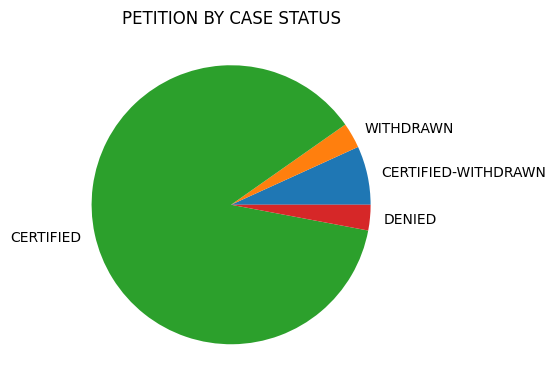

In [54]:
from matplotlib.pyplot import pie , axis , show

import matplotlib.pyplot as plt
plt.figure(figsize=(4.5,4.5))
plt.title("PETITION BY CASE STATUS")
axis('equal')
pie(s_f[:4],labels = states[:4])
show()

calculating petitions distribution per year

In [ ]:
f['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.])

In [ ]:
y = [2016., 2015., 2014., 2013., 2012., 2011.]
y_c = [0]*6
for j in range(0,6):
    y_c[j] = f[f.YEAR==y[j]]['YEAR'].count()
y_c

[np.int64(629299),
 np.int64(600120),
 np.int64(498027),
 np.int64(422427),
 np.int64(394267),
 np.int64(333625)]

ANALYZING DENIED PETITIONS PER YEAR

In [ ]:
den = f[f.CASE_STATUS=='DENIED']
len(den)

94346

In [ ]:
del den['CASE_STATUS']
den = den.reset_index()
den.head(2)

,index,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATES,LON,LAT
0,39,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,2016.0,WASHINGTON,-122.22,47.48
1,47,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,2016.0,CALIFORNIA,-117.16,32.72


Calculating denied petition distribution per year

In [ ]:
d_y = [0]*6
for i in range(0,6):
    d_y[i]=den[den.YEAR==y[i]]['YEAR'].count()
d_y

[9175, 10923, 11896, 12126, 21096, 29130]

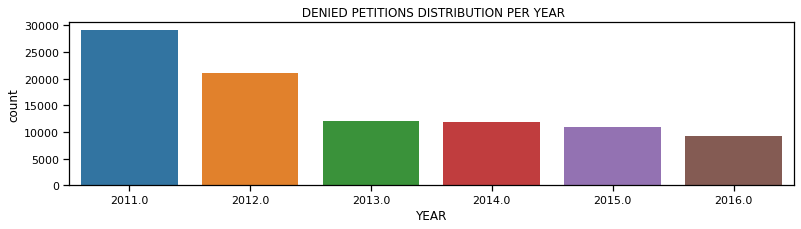

In [ ]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize = (13,3))
plt.title(" DENIED PETITIONS DISTRIBUTION PER YEAR")
sns.countplot(den['YEAR'])

Calculating the rate at which denied petitins per year


In [ ]:
d_y_r = [0]*6
for i in range(0,6):
    d_y_r[i] = float("% .2f" %((d_y[i]/y_c[i])*100))
ratio = pd.DataFrame()
ratio['YEAR'] = y
ratio['denied rate %'] = d_y_r
ratio = ratio.set_index(['YEAR'])
ratio


,denied rate %
YEAR,
2016.0,1.42
2015.0,1.77
2014.0,2.29
2013.0,2.74
2012.0,5.08
2011.0,8.12


In [ ]:
ratio.T

YEAR,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0
denied rate %,1.42,1.77,2.29,2.74,5.08,8.12


In [ ]:
ratio = ratio.reset_index()
ratio

,YEAR,denied rate %
0,2016.0,1.42
1,2015.0,1.77
2,2014.0,2.29
3,2013.0,2.74
4,2012.0,5.08
5,2011.0,8.12


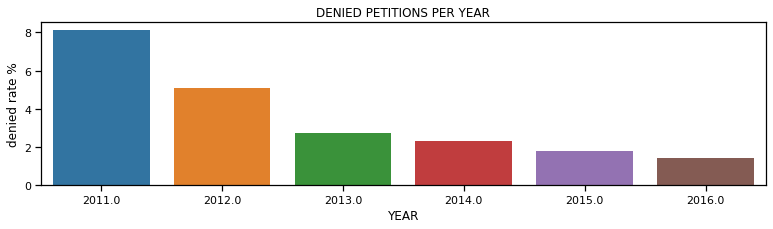

In [ ]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,3))
plt.title("DENIED PETITIONS PER YEAR")
g = sns.barplot(x ='YEAR',y ='denied rate %',data=ratio)

Calculating the number of petitions filled by the states


In [ ]:
f['STATES'].unique()

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA',
       'MASSACHUSETTS', 'WISCONSIN', 'ILLINOIS', 'DISTRICT OF COLUMBIA',
       'NORTH CAROLINA', 'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA',
       'NEW YORK', 'INDIANA', 'MARYLAND', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'MISSISSIPPI', 'HAWAII', 'UTAH', 'DELAWARE', 'MARIANA ISLAND',
       'KANSAS', 'CONNECTICUT', 'MAINE', 'NEBRASKA', 'OKLAHOMA',
       'ARKANSAS', 'KENTUCKY', 'PUERTO RICO', 'ALASKA', 'WYOMING', 'IOWA',
       'OREGON', 'IDAHO', 'NEW MEXICO', 'WEST VIRGINIA', 'SOUTH DAKOTA',
       'NORTH DAKOTA', 'ALABAMA', 'VERMONT', 'MONTANA'], dtype=object)

In [ ]:
US_states = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CAALIFORNIA','COLORADO','CONNECTICUT','DELAWARE','DISTRICT OF COLUMBIA','FLORIDA','GEORGIA','HAWII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY','LOUISTANA','MAINE','MARIANA ISLANDS','MARYLAND','MASSACHUUSSETS','MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK','NORTH CAROLINA','NORTH DAKOTA','OHIO','OKALHOMA','OREGON','PENNSYLVANIA','PUERTO RICO','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA','TENNESEE','TEXAS','UTAH','VERMONT','VIRGINIA','WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']
p_s = [0]*53
for i in  range(0,53):
    p_s[i]= f[f.STATES == US_states[i]]['STATES'].count()
pe = pd.DataFrame()
pe['STATES']= US_states
pe['FIELD PETITIONS'] = p_s
print(sum(p_s))

2268755


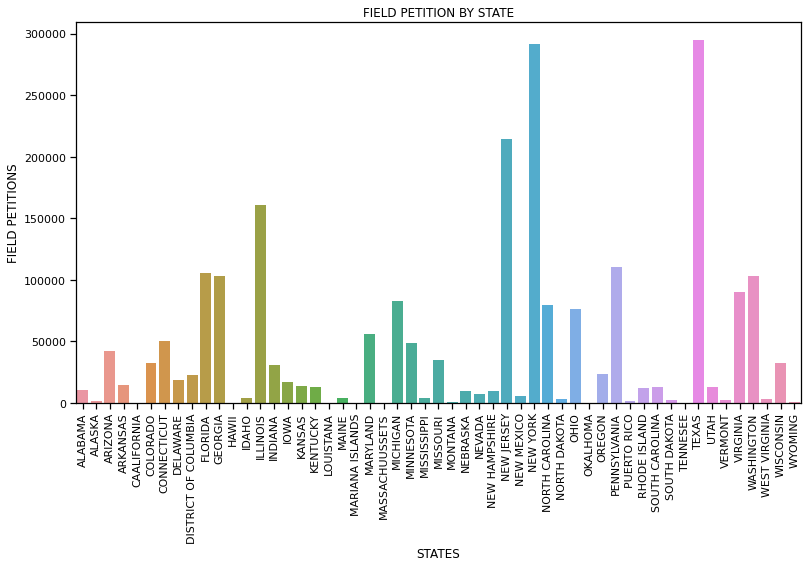

In [ ]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,7))
plt.title("FIELD PETITION BY STATE")
g = sns.barplot(x ='STATES',y ='FIELD PETITIONS',data=pe)
v = g.set_xticklabels(g.get_xticklabels(),rotation = 90)

NO. OF PETITIONS DENIED BY STATE

In [ ]:
deni = [0]*53
for i in range(0,53):
    deni[i]= den[den.STATES==US_states[i]]['STATES'].count()
de_s = pd.DataFrame()
de_s['STATES'] = US_states
de_s['DENIED PETITIONS'] = deni
de_s

,STATES,DENIED PETITIONS
0,ALABAMA,522
1,ALASKA,158
2,ARIZONA,1157
3,ARKANSAS,333
4,CAALIFORNIA,0
5,COLORADO,1143
6,CONNECTICUT,1236
7,DELAWARE,367
8,DISTRICT OF COLUMBIA,1182
9,FLORIDA,5577


In [ ]:
print(sum(deni))

69911


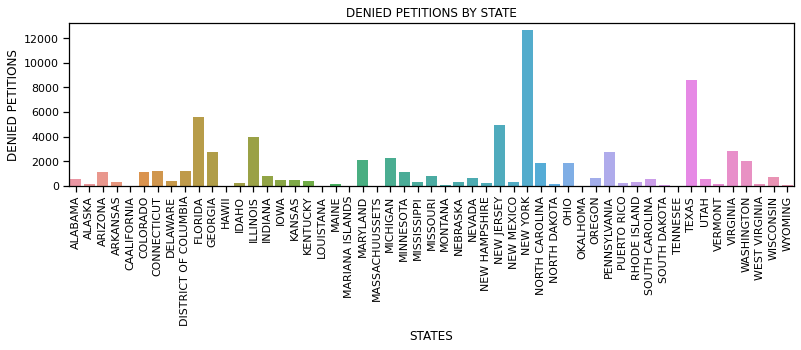

In [ ]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,3))
plt.title("DENIED PETITIONS BY STATE")
g = sns.barplot(x ='STATES',y ='DENIED PETITIONS',data=de_s)
v = g.set_xticklabels(g.get_xticklabels(),rotation = 90)